<a href="https://colab.research.google.com/github/vedantpople4/LLM/blob/main/Part2_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

import tensorflow.keras

2.17.0


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I like Soccer',
    'I, like Basketball',
    'You love Soccer!',
    'Do you play Soccer or Basketball'
]

In [ ]:
from os import WCOREDUMP
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index

In [ ]:
print(word_index)

{'<OOV>': 1, 'soccer': 2, 'i': 3, 'like': 4, 'basketball': 5, 'you': 6, 'love': 7, 'do': 8, 'play': 9, 'or': 10}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index: ", word_index)
print("\nSequences: ", sequences)
print("\nPadded Sequences: ")
print(padded)


Word Index:  {'<OOV>': 1, 'soccer': 2, 'i': 3, 'like': 4, 'basketball': 5, 'you': 6, 'love': 7, 'do': 8, 'play': 9, 'or': 10}

Sequences:  [[3, 4, 2], [3, 4, 5], [6, 7, 2], [8, 6, 9, 2, 10, 5]]

Padded Sequences: 
[[ 0  0  3  4  2]
 [ 0  0  3  4  5]
 [ 0  0  6  7  2]
 [ 6  9  2 10  5]]


In [ ]:
test_data = [
    'I really like to play Basketball',
    'My favorite sport is Soccer'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence: ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence:  [[3, 1, 4, 1, 9, 5], [1, 1, 1, 1, 2]]

Padded Test Sequence: 
[[0 0 0 0 3 1 4 1 9 5]
 [0 0 0 0 0 1 1 1 1 2]]


In [ ]:
import json

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

--2024-11-14 03:55:08--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2024-11-14 03:55:08 (158 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
train = sentences[0: training_size]
test = sentences[training_size:]

train_labels = labels[0: training_size]
test_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np

train_padded = np.array(train_padded)
train_labels = np.array(train_labels)

test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 6ms/step - accuracy: 0.5650 - loss: 0.6811 - val_accuracy: 0.5864 - val_loss: 0.6759
Epoch 2/30
625/625 - 3s - 5ms/step - accuracy: 0.7197 - loss: 0.5586 - val_accuracy: 0.7764 - val_loss: 0.4706
Epoch 3/30
625/625 - 3s - 5ms/step - accuracy: 0.8262 - loss: 0.4048 - val_accuracy: 0.7985 - val_loss: 0.4214
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.8476 - loss: 0.3504 - val_accuracy: 0.8037 - val_loss: 0.4112
Epoch 5/30
625/625 - 3s - 4ms/step - accuracy: 0.8691 - loss: 0.3151 - val_accuracy: 0.8438 - val_loss: 0.3625
Epoch 6/30
625/625 - 2s - 4ms/step - accuracy: 0.8808 - loss: 0.2869 - val_accuracy: 0.8535 - val_loss: 0.3500
Epoch 7/30
625/625 - 4s - 7ms/step - accuracy: 0.8899 - loss: 0.2658 - val_accuracy: 0.8343 - val_loss: 0.3693
Epoch 8/30
625/625 - 2s - 4ms/step - accuracy: 0.9036 - loss: 0.2433 - val_accuracy: 0.8542 - val_loss: 0.3439
Epoch 9/30
625/625 - 2s - 4ms/step - accuracy: 0.9123 - loss: 0.2198 - val_accuracy: 0.8413 - val_loss: 0.3632
E

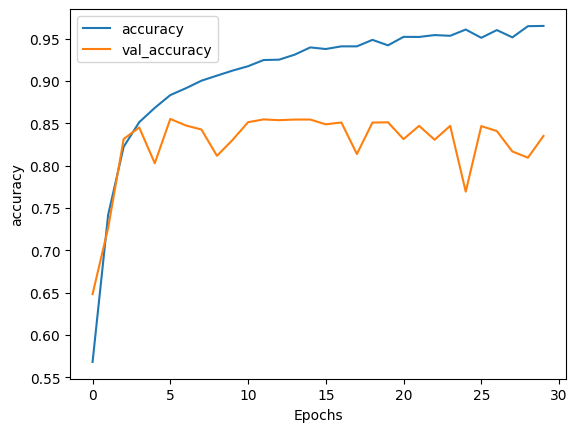

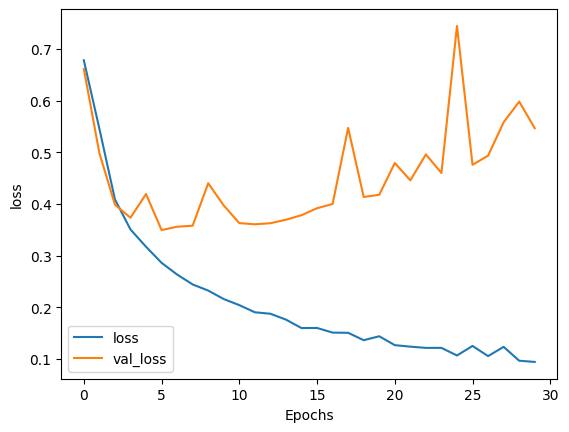

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.6009787 ]
 [0.01340491]]


In [ ]:
# NOW USING BIDIRECTIONAL LAYERS IN MODEL

In [ ]:
bidirectional_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bidirectional_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
num_epochs = 10
bi_history = bidirectional_model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/10
625/625 - 57s - 91ms/step - accuracy: 0.9428 - loss: 0.1516 - val_accuracy: 0.8368 - val_loss: 0.4349
Epoch 2/10
625/625 - 58s - 93ms/step - accuracy: 0.9609 - loss: 0.1102 - val_accuracy: 0.8407 - val_loss: 0.4246
Epoch 3/10
625/625 - 81s - 130ms/step - accuracy: 0.9737 - loss: 0.0786 - val_accuracy: 0.8343 - val_loss: 0.5477
Epoch 4/10
625/625 - 83s - 132ms/step - accuracy: 0.9813 - loss: 0.0590 - val_accuracy: 0.8310 - val_loss: 0.5856
Epoch 5/10
625/625 - 57s - 92ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.8316 - val_loss: 0.6600
Epoch 6/10
625/625 - 81s - 130ms/step - accuracy: 0.9909 - loss: 0.0304 - val_accuracy: 0.8275 - val_loss: 0.7452
Epoch 7/10
625/625 - 58s - 93ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.8216 - val_loss: 0.8703
Epoch 8/10
625/625 - 81s - 129ms/step - accuracy: 0.9952 - loss: 0.0175 - val_accuracy: 0.8265 - val_loss: 0.9861
Epoch 9/10
625/625 - 88s - 140ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.82

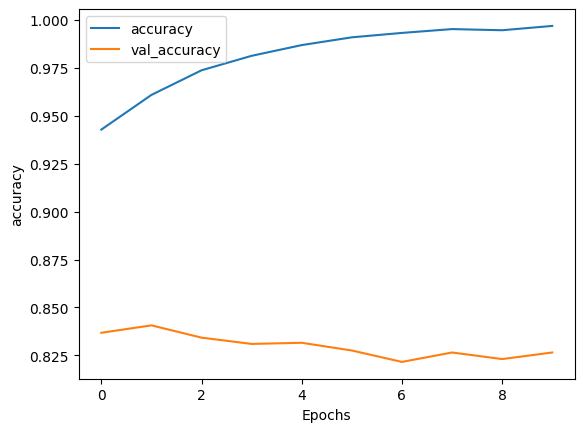

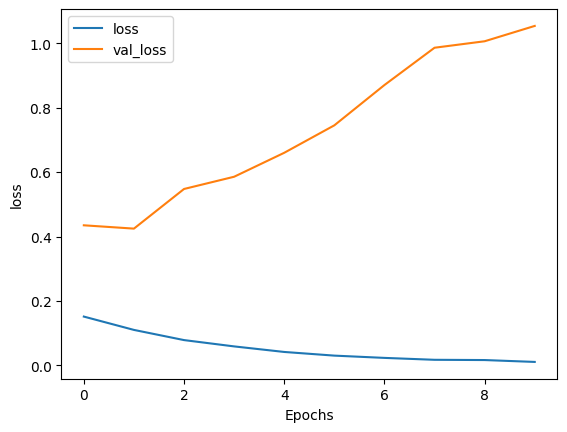

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(bi_history, "accuracy")
plot_graphs(bi_history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(bidirectional_model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
[[1.1693863e-04]
 [6.1302823e-01]]
